# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [6]:
import pandas as pd

penguins = pd.read_csv("data/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

First, create two models, a linear regression model and a decision tree regression model, and fit them on the training data. Limit the depth at 3 levels for the decision tree.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_regression = LinearRegression()
tree = DecisionTreeRegressor(max_depth=3)

linear_regression.fit(data_train, target_train)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a testing dataset, ranging from the minimum to the maximum of the flipper length of the training dataset. Get the predictions of each model using this test dataset.

In [8]:
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)

linear_predicted = linear_regression.predict(data_test)
tree_predicted = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the predictions of both model on the top.

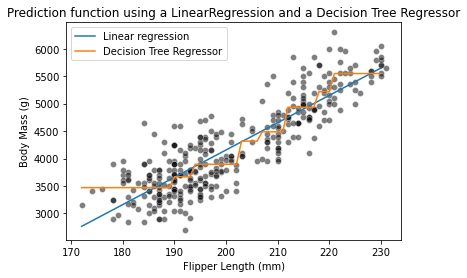

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, linear_predicted, label="Linear regression")
plt.plot(data_test, tree_predicted, label="Decision Tree Regressor")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression and a Decision Tree Regressor")

The predictions that we got were within the range of feature values seen during training. In some sense, we observe the capabilities of our model to interpolate.

Now, we will check the extrapolation capabilities of each model. Create a dataset containing the value of your previous dataset. Besides, add values below and above the minimum and the maximum of the flipper length seen during training.

In [11]:
offset = 30
data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min() - offset,
                                   data_train[data_columns[0]].max() + offset),
                         columns=data_columns)

Finally, make predictions with both models on this new testing set. Repeat the plotting of the previous exercise.

In [12]:
linear_predicted = linear_regression.predict(data_test)
tree_predicted = tree.predict(data_test)

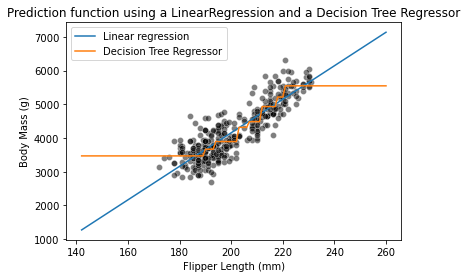

In [13]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, linear_predicted, label="Linear regression")
plt.plot(data_test, tree_predicted, label="Decision Tree Regressor")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression and a Decision Tree Regressor")

The linear model will extrapolate using the fitted model for flipper lengths < 175 mm and > 235 mm. In fact, we are using the model parametrization to make this predictions.

As mentioned, decision trees are non-parametric models and we observe that they cannot extrapolate. For flipper lengths below the minimum, the mass of the penguin in the training data with the shortest flipper length will always be predicted. Similarly, for flipper lengths above the maximum, the mass of the penguin in the training data with the longest flipper will always be predicted.